In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [17]:
df = pd.read_csv('clean_data-1.csv')
df.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591


In [18]:
df.shape

(85870, 8)

In [19]:
df.isna().sum()

year                    0
month                   0
stateDescription        0
sectorName              0
customers           26040
price                   0
revenue                 0
sales                   0
dtype: int64

In [20]:
df.nunique()

year                   24
month                  12
stateDescription       62
sectorName              6
customers           45038
price                2943
revenue             78693
sales               79292
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  object 
 3   sectorName        85870 non-null  object 
 4   customers         59830 non-null  float64
 5   price             85870 non-null  float64
 6   revenue           85870 non-null  float64
 7   sales             85870 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.2+ MB


In [22]:
df['customers'].unique()[:20]

array([         nan, 3.145488e+06, 0.000000e+00, 1.414200e+04,
       2.611383e+06, 1.000000e+00, 4.820789e+06, 5.167520e+05,
       1.252200e+04, 4.291514e+06, 2.542667e+06, 2.675370e+05,
       8.233000e+03, 2.266896e+06, 1.462617e+06, 2.235460e+05,
       7.137000e+03, 1.231934e+06, 9.404000e+03, 3.189000e+03])

In [23]:
# filling nan with mean
df_1 = df.fillna(0)

In [24]:
df_1.shape

(85870, 8)

In [25]:
df_1.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,0.0,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,0.0,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,0.0,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,0.0,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,0.0,6.01,15.07136,250.60591


In [26]:
df_1.isna().sum()

year                0
month               0
stateDescription    0
sectorName          0
customers           0
price               0
revenue             0
sales               0
dtype: int64

In [27]:
df.nunique()

year                   24
month                  12
stateDescription       62
sectorName              6
customers           45038
price                2943
revenue             78693
sales               79292
dtype: int64

In [28]:
# printing unique values of the furst four columns
for col in df.columns[:4]:
    print(f'{col} : {df[col].unique()} \n')

year : [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024] 

month : [ 1  2  3  4  5  6  7  8  9 10 11 12] 

stateDescription : ['Wyoming' 'New England' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Alabama' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Middle Atlantic'
 'Pacific Contiguous' 'Pacific Noncontiguous' 'U.S. Total' 'Missouri'
 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico'
 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Rhode Island' 'Alaska' 'Arizona' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'East North Central' 'West North Central' 'South Atlantic'
 'East South Central' 'West South Central' 'Mountain' 'Pennsy

In [29]:
# saving the cleaned data
df_1.to_csv('clean_data-2.csv', index=False)

In [30]:
# identifying the categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['stateDescription', 'sectorName'], dtype='object')

In [31]:
# convert all categorical columns to numerical using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_1[cat_cols] = encoder.fit_transform(df_1[cat_cols])

# saving this encoder
from joblib import dump

dump(encoder, 'cat_encoder.joblib')

['cat_encoder.joblib']

In [32]:
# checking the encoder properties
encoder.categories_

[array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'East North Central', 'East South Central', 'Florida', 'Georgia',
        'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
        'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
        'Michigan', 'Middle Atlantic', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Mountain', 'Nebraska', 'Nevada',
        'New England', 'New Hampshire', 'New Jersey', 'New Mexico',
        'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
        'Oregon', 'Pacific Contiguous', 'Pacific Noncontiguous',
        'Pennsylvania', 'Rhode Island', 'South Atlantic', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'U.S. Total', 'Utah',
        'Vermont', 'Virginia', 'Washington', 'West North Central',
        'West South Central', 'West Virginia', 'Wisconsin', 'Wyoming'],
       dtype=object),
 array

In [33]:
df_1.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,61.0,0.0,0.0,4.31,48.12840,1116.17208
1,2001,1,61.0,1.0,0.0,5.13,12.67978,247.08691
2,2001,1,61.0,2.0,0.0,3.26,19.60858,602.30484
3,2001,1,61.0,3.0,0.0,4.75,0.76868,16.17442
4,2001,1,61.0,4.0,0.0,6.01,15.07136,250.60591


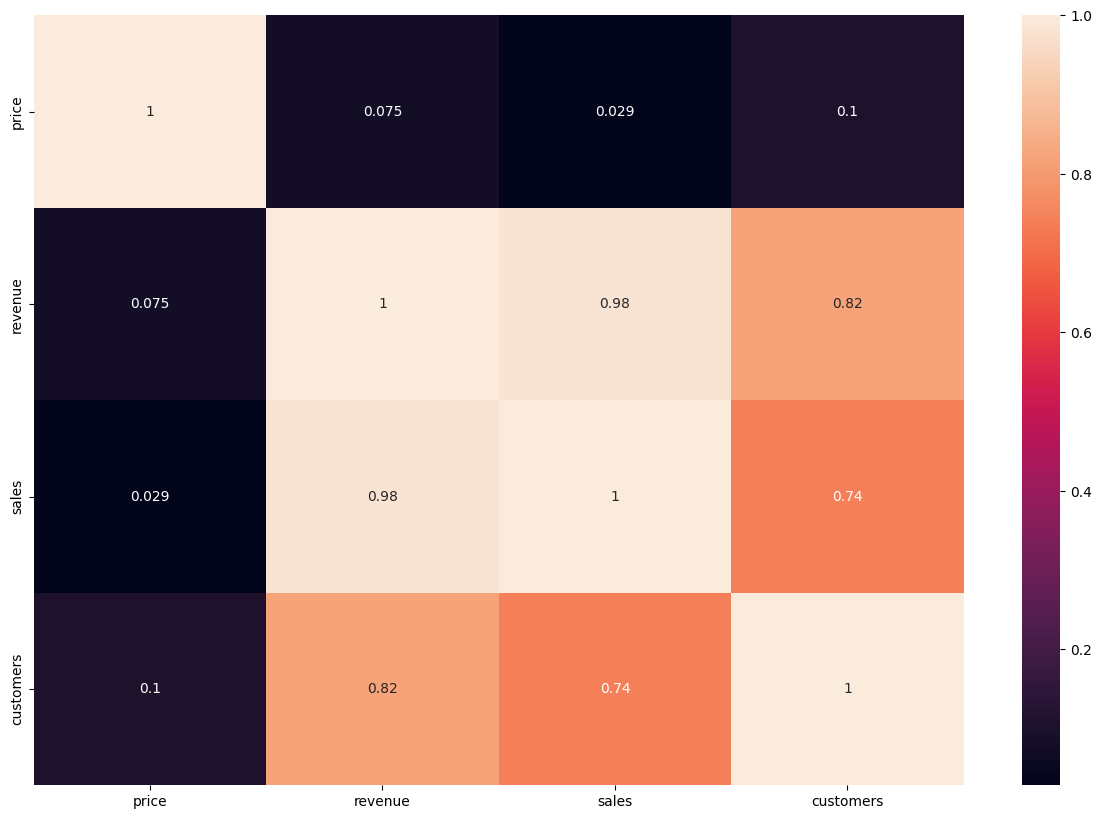

In [34]:
# looking out for correlation between price, sales and revenue
plt.figure(figsize=(15, 10))
sns.heatmap(df_1[['price', 'revenue', 'sales', 'customers']].corr(), annot=True)
plt.show()

- There is almost no correlation between the price and the company sales an revenue
- We can see that there is high correlation between the sales and revenue

In [35]:
# creating a date column from the year and month columns
df_1['date'] = pd.to_datetime(df_1[['year', 'month']].assign(day=1))

In [36]:
df_1

,year,month,stateDescription,sectorName,customers,price,revenue,sales,date
0,2001,1,61.0,0.0,0.0,4.31,48.12840,1116.17208,2001-01-01
1,2001,1,61.0,1.0,0.0,5.13,12.67978,247.08691,2001-01-01
2,2001,1,61.0,2.0,0.0,3.26,19.60858,602.30484,2001-01-01
3,2001,1,61.0,3.0,0.0,4.75,0.76868,16.17442,2001-01-01
4,2001,1,61.0,4.0,0.0,6.01,15.07136,250.60591,2001-01-01
...,...,...,...,...,...,...,...,...,...
85865,2024,1,3.0,0.0,1717720.0,9.63,442.98773,4598.63147,2024-01-01
85866,2024,1,3.0,1.0,208669.0,10.26,97.79467,953.02154,2024-01-01
85867,2024,1,3.0,2.0,34951.0,7.08,109.92656,1553.02838,2024-01-01
85868,2024,1,3.0,4.0,1474098.0,11.24,235.26399,2092.56172,2024-01-01


In [37]:
# dropping the year and month columns
# df_2 = df_1.drop(['year', 'month'], axis=1)
df_2 = df_1.copy()
df_2.head(10)

,year,month,stateDescription,sectorName,customers,price,revenue,sales,date
0,2001,1,61.0,0.0,0.0,4.31,48.12840,1116.17208,2001-01-01
1,2001,1,61.0,1.0,0.0,5.13,12.67978,247.08691,2001-01-01
2,2001,1,61.0,2.0,0.0,3.26,19.60858,602.30484,2001-01-01
3,2001,1,61.0,3.0,0.0,4.75,0.76868,16.17442,2001-01-01
4,2001,1,61.0,4.0,0.0,6.01,15.07136,250.60591,2001-01-01
5,2001,1,33.0,0.0,0.0,10.73,1139.89520,10622.88375,2001-01-01
6,2001,1,48.0,3.0,0.0,6.57,5.28332,80.41336,2001-01-01
7,2001,1,48.0,4.0,0.0,7.36,225.81673,3066.25911,2001-01-01
8,2001,1,49.0,0.0,0.0,5.85,46.98518,803.24177,2001-01-01
9,2001,1,49.0,1.0,0.0,5.95,15.92044,267.66283,2001-01-01


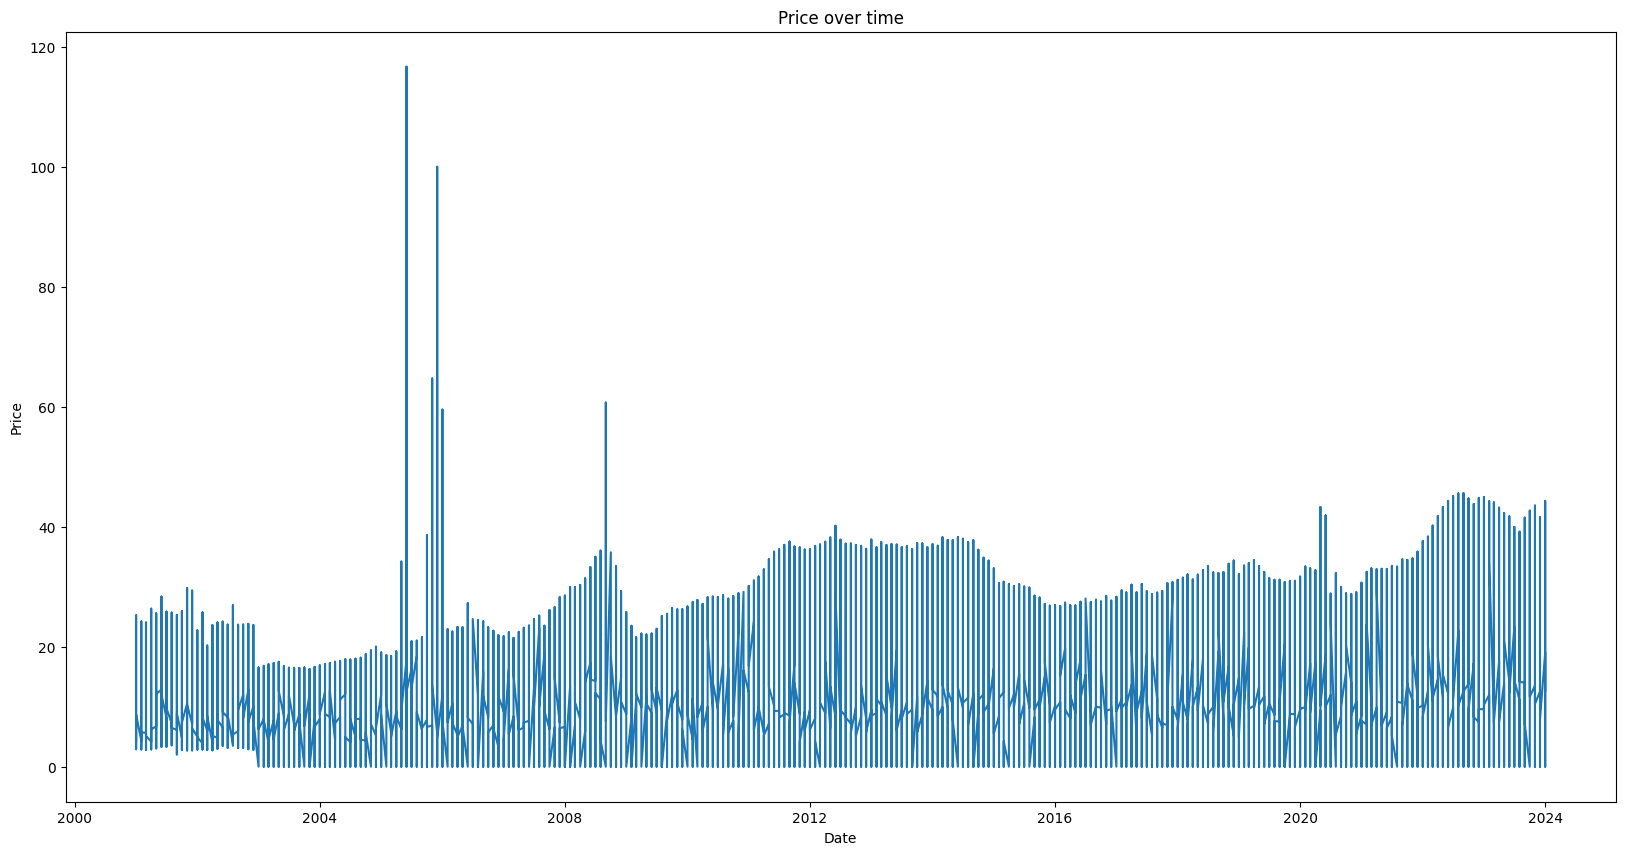

In [38]:
# making a plot of the prices over time using the date column
plt.figure(figsize=(20, 10))
plt.plot(df_2['date'], df_2['price'])
plt.title('Price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

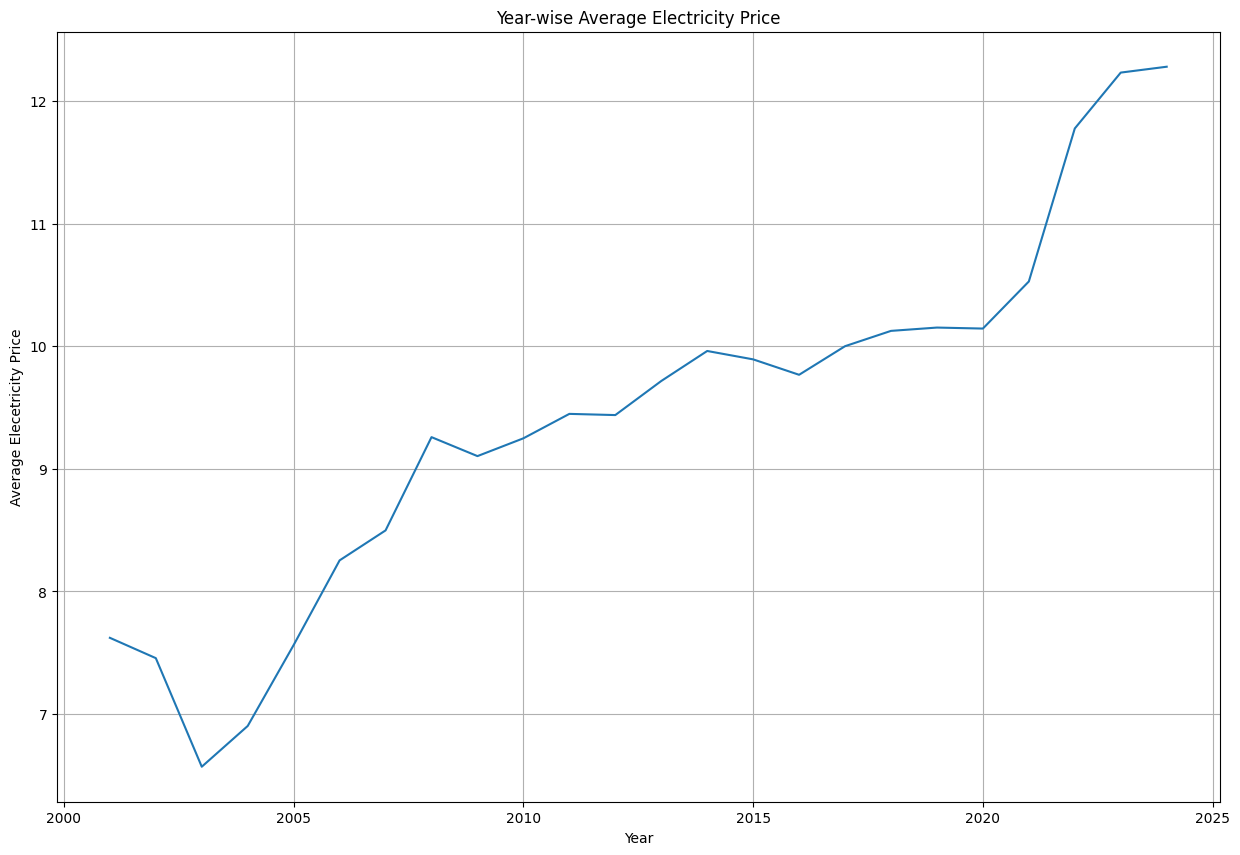

In [39]:
# checking the yearly average price of electricity
plt.figure(figsize=(15,10))
yearly_avg_price = df_2.groupby('year')['price'].mean().reset_index()
plt.plot(yearly_avg_price['year'],yearly_avg_price['price'])
plt.title('Year-wise Average Electricity Price')
plt.xlabel('Year')
plt.ylabel('Average Elecetricity Price')
plt.grid(True)
plt.show()

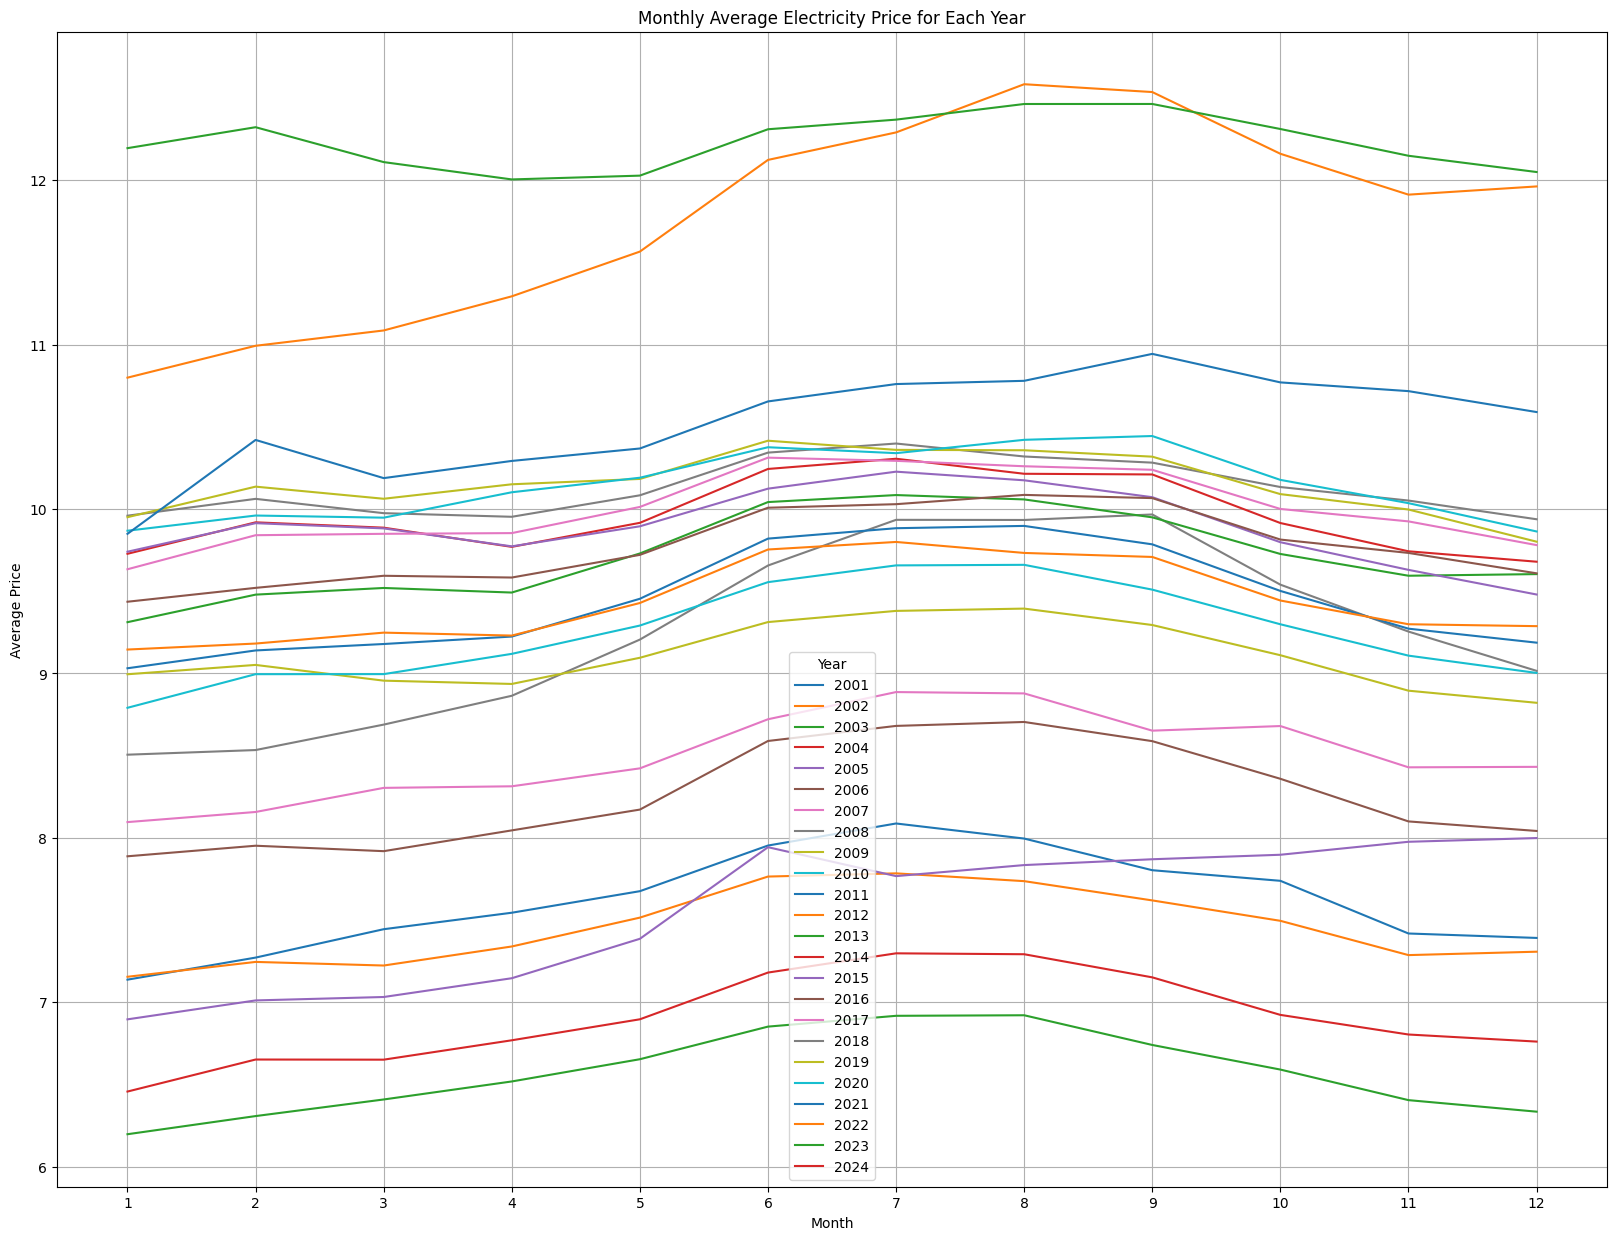

In [40]:
plt.figure(figsize=(20,15))
monthly_avg = df_2.groupby(['year','month'])['price'].mean().reset_index()
for year in monthly_avg['year'].unique():
    df_2_by_year = monthly_avg[monthly_avg['year'] == year]
    plt.plot(df_2_by_year['month'], df_2_by_year['price'], label=year)

plt.title('Monthly Average Electricity Price for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

## Time series analysis tests

### Test for values for constant mean and variance over time.

In [41]:
### Test for values for constant mean and variance over time.
# Testing for constant mean
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_2['price'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Testing for constant variance
from statsmodels.stats.diagnostic import het_arch

p_value = het_arch(df_2['price'])[1]
print(p_value)

ADF Statistic: -18.246640
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
0.0


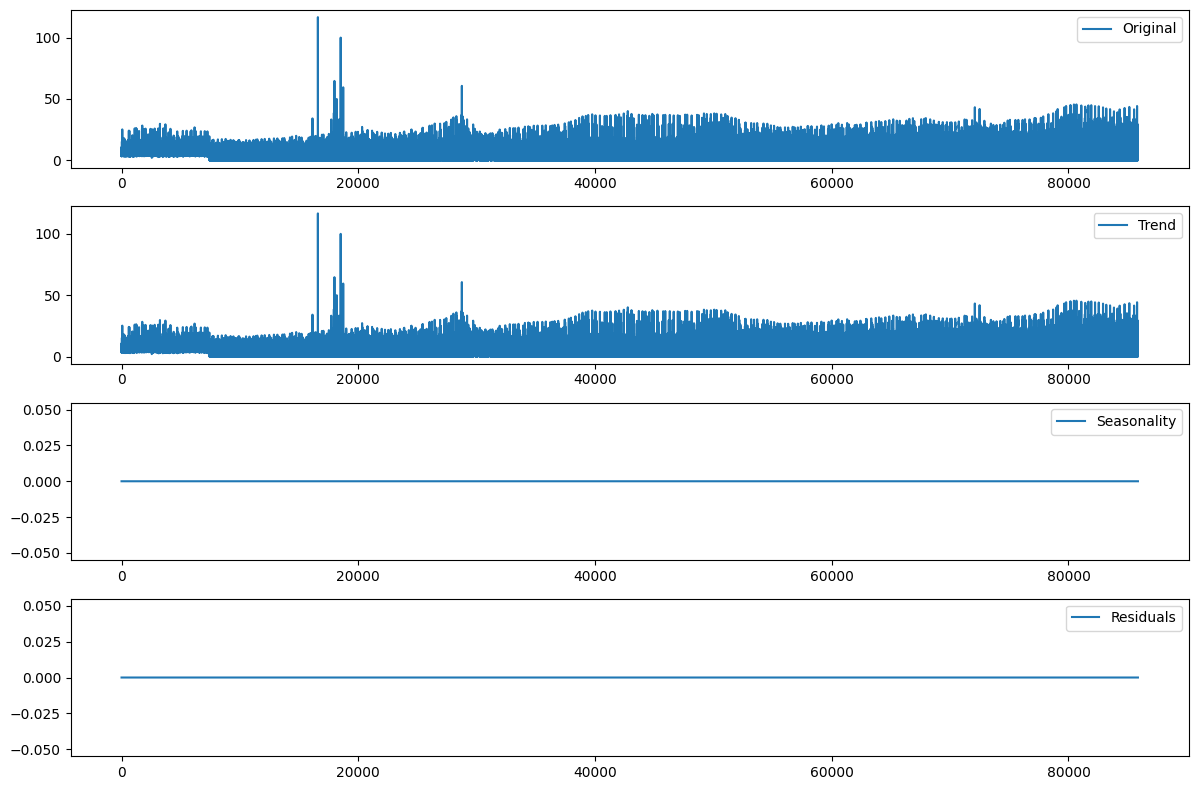

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df_2' is your DataFrame and 'price' is your column of interest
decomposition = seasonal_decompose(df_2['price'], model='additive', period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_2['price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


- Your Augmented Dickey-Fuller (ADF) test results indicate that your time series data is stationary.

- Here’s how to interpret the results:

- The ADF Statistic is a negative number, and the more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence. Your ADF Statistic is -18.246640, which is a strong negative number.
- The p-value is 0.000000, which is less than 0.05, allowing us to reject the null hypothesis. This means the time series does not have a unit root, and in turn, indicates stationarity.
- The critical values at 1%, 5%, and 10% confidence intervals are -3.430, -2.862, and -2.567 respectively. Your ADF statistic is less than the value of the critical values, which confirms that the time series is stationary.
- Now that you’ve established that your time series is stationary, you can apply various forecasting models like ARIMA (AutoRegressive Integrated Moving Average), which work well on stationary data.

### Performing Auto Correlation plot

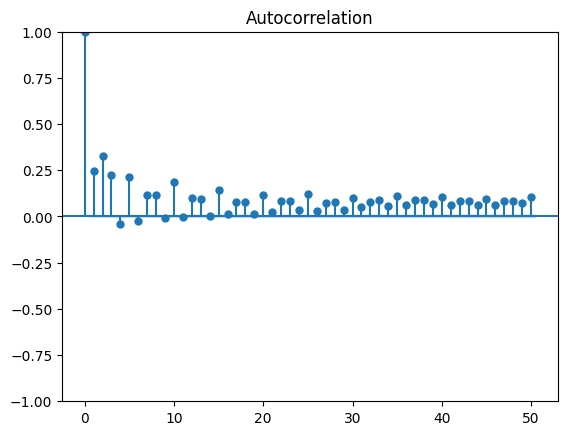

In [43]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'df' is your DataFrame and 'time_series' is your column of interest
plot_acf(df_2['price'])
plt.show()


- The autocorrelation plot you’ve provided suggests the following:

- Lag 0: As expected, there’s a perfect positive autocorrelation at lag 0 because a variable is always perfectly correlated with itself.
- Rapid Decrease: The autocorrelation decreases rapidly after lag 0, which indicates that the immediate past values have some degree of correlation with the current value.
- Stabilization: After the initial decrease, the autocorrelation coefficients stabilize close to zero, suggesting that past values are not significantly correlated with current values beyond a certain point.
- This pattern typically indicates that the time series may have some short-term predictability, where only the recent past is useful in predicting the future values. Long-term predictions would be less reliable as the autocorrelation diminishes.

- If most of the spikes in the plot fall within the confidence interval (the blue shaded area), it means that the autocorrelations are not statistically significant, and the time series might be considered white noise.

- However, if there are spikes outside of the confidence interval, those lags are considered to have significant autocorrelation and could be important for your time series model.

## Preparing for modeling

In [44]:
# Assuming 'df' is your DataFrame and 'time_series' is your column of interest
train_data = df_2['price'].iloc[:int(len(df_2)*0.9)]
test_data = df_2['price'].iloc[int(len(df_2)*0.9):]


## Modeling

### Arima

In [45]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,1)) # change the order parameters based on your data
model_fit = model.fit()

# make prediction on test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)


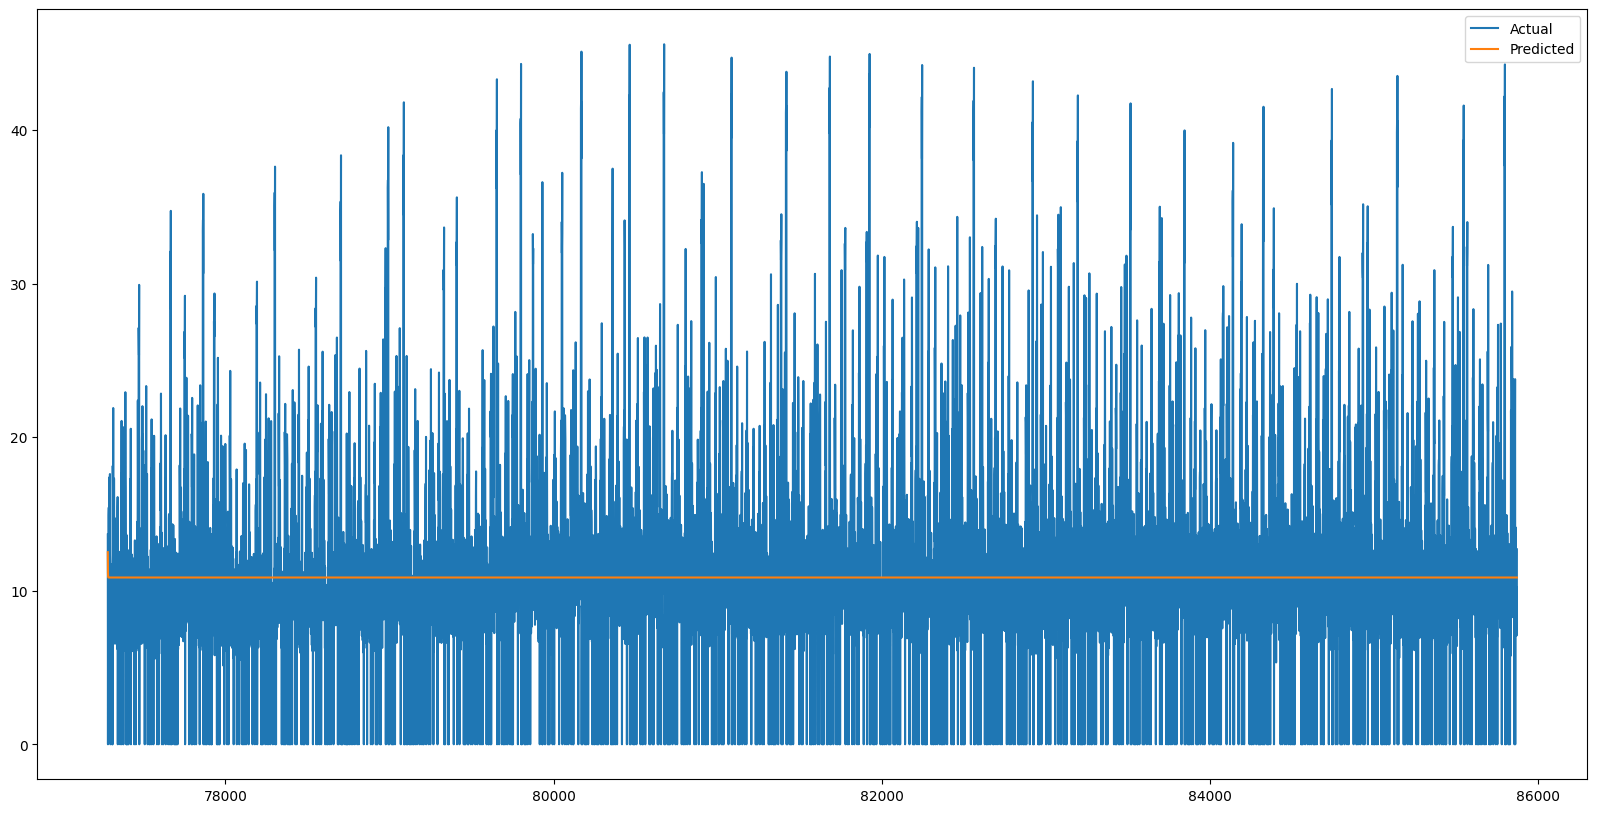

In [46]:
# making a plot to see actual vs predicted values
plt.figure(figsize=(20,10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.legend()
plt.show()


In [47]:
test_data[:20], predictions[:20]

(77283    13.66
 77284     0.00
 77285    10.85
 77286    10.81
 77287     7.65
 77288    14.92
 77289    15.42
 77290     8.18
 77291     9.69
 77292     6.82
 77293    16.11
 77294    17.41
 77295    11.66
 77296    17.60
 77297    12.33
 77298    11.80
 77299     0.00
 77300     9.23
 77301     8.50
 77302     6.77
 Name: price, dtype: float64,
 77283    12.511044
 77284    11.138858
 77285    10.908364
 77286    10.869647
 77287    10.863143
 77288    10.862050
 77289    10.861867
 77290    10.861836
 77291    10.861831
 77292    10.861830
 77293    10.861830
 77294    10.861830
 77295    10.861830
 77296    10.861830
 77297    10.861830
 77298    10.861830
 77299    10.861830
 77300    10.861830
 77301    10.861830
 77302    10.861830
 Name: predicted_mean, dtype: float64)

In [48]:
# calculating the mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 45.050234817988986


### Sarimax

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# make prediction on test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)


In [ ]:
test_data[:20], predictions[:20]

(77283    13.66
 77284     0.00
 77285    10.85
 77286    10.81
 77287     7.65
 77288    14.92
 77289    15.42
 77290     8.18
 77291     9.69
 77292     6.82
 77293    16.11
 77294    17.41
 77295    11.66
 77296    17.60
 77297    12.33
 77298    11.80
 77299     0.00
 77300     9.23
 77301     8.50
 77302     6.77
 Name: price, dtype: float64,
 77283    12.673820
 77284    11.509709
 77285    11.223405
 77286    11.390979
 77287    10.887649
 77288    11.055941
 77289    11.078808
 77290    11.046756
 77291    10.668478
 77292    11.045385
 77293    10.656155
 77294    11.286118
 77295    11.229860
 77296    10.990635
 77297    10.970205
 77298    11.043957
 77299    11.201207
 77300    11.069062
 77301    11.099409
 77302    11.012851
 Name: predicted_mean, dtype: float64)

In [ ]:
# calculating the mean squared error
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 44.075893404772515


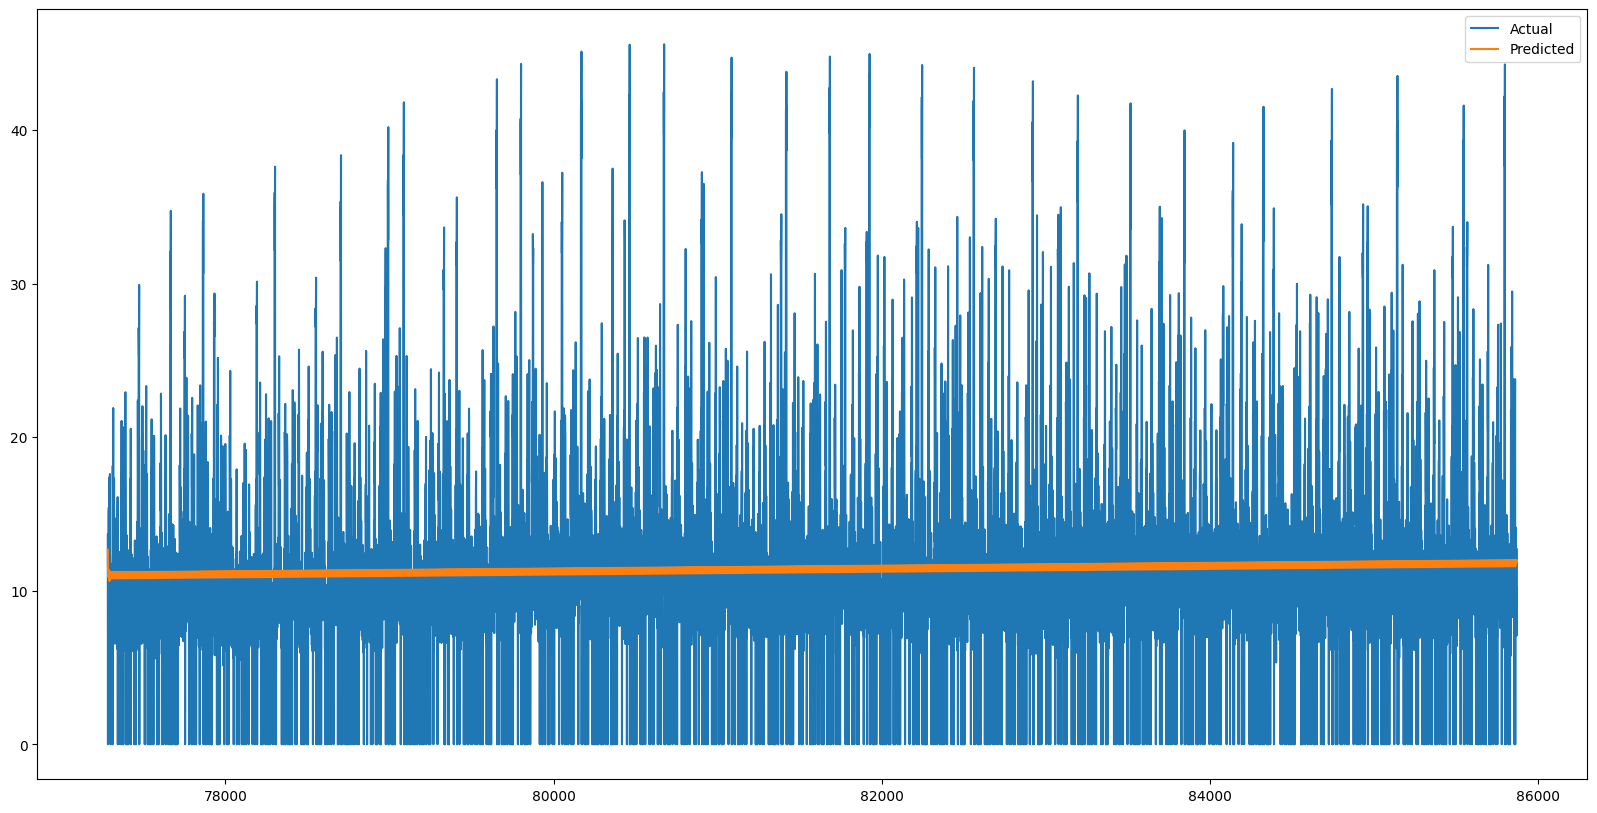

In [ ]:
# making a plot to see actual vs predicted values
plt.figure(figsize=(20,10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create the model
model = ExponentialSmoothing(train_data)

# Fit the model
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

In [ ]:
test_data[:20], forecast[:20]

(77283    13.66
 77284     0.00
 77285    10.85
 77286    10.81
 77287     7.65
 77288    14.92
 77289    15.42
 77290     8.18
 77291     9.69
 77292     6.82
 77293    16.11
 77294    17.41
 77295    11.66
 77296    17.60
 77297    12.33
 77298    11.80
 77299     0.00
 77300     9.23
 77301     8.50
 77302     6.77
 Name: price, dtype: float64,
 77283    11.171768
 77284    11.171768
 77285    11.171768
 77286    11.171768
 77287    11.171768
 77288    11.171768
 77289    11.171768
 77290    11.171768
 77291    11.171768
 77292    11.171768
 77293    11.171768
 77294    11.171768
 77295    11.171768
 77296    11.171768
 77297    11.171768
 77298    11.171768
 77299    11.171768
 77300    11.171768
 77301    11.171768
 77302    11.171768
 dtype: float64)

In [ ]:
# Calculate root mean squared error
rmse = ((forecast - test_data) ** 2).mean()
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 3)}')

The Root Mean Squared Error of our forecasts is 44.515


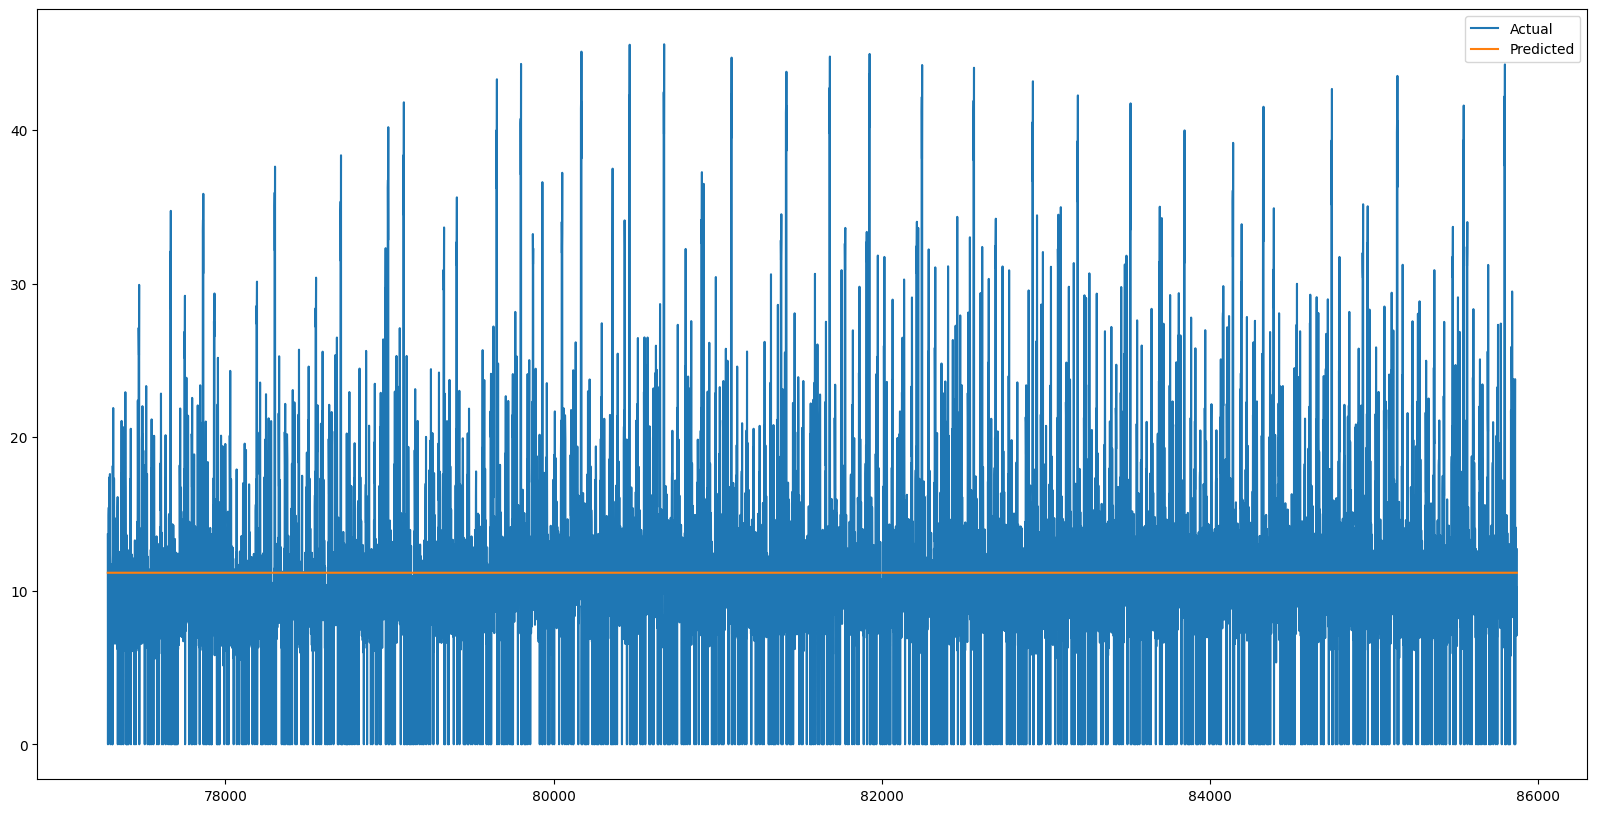

In [ ]:
# making a plot to see actual vs predicted values
plt.figure(figsize=(20,10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.legend()
plt.show()


## Building Deep Learning Model


In [ ]:
df_2.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales,date
0,2001,1,61.0,0.0,0.0,4.31,48.12840,1116.17208,2001-01-01
1,2001,1,61.0,1.0,0.0,5.13,12.67978,247.08691,2001-01-01
2,2001,1,61.0,2.0,0.0,3.26,19.60858,602.30484,2001-01-01
3,2001,1,61.0,3.0,0.0,4.75,0.76868,16.17442,2001-01-01
4,2001,1,61.0,4.0,0.0,6.01,15.07136,250.60591,2001-01-01


In [ ]:
df_2.nunique()

year                   24
month                  12
stateDescription       62
sectorName              6
customers           45038
price                2943
revenue             78693
sales               79292
date                  277
dtype: int64

In [ ]:
df_2.describe()

,year,month,stateDescription,sectorName,customers,price,revenue,sales,date
count,85870.000000,85870.000000,85870.000000,85870.000000,8.587000e+04,85870.000000,85870.000000,85870.000000,85870
mean,2012.043321,6.480144,30.500000,2.365343,2.031735e+06,9.300193,586.627155,5980.048970,2012-07-01 07:01:04.981949440
min,2001.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000010,0.000000,2001-01-01 00:00:00
25%,2006.000000,3.000000,15.000000,1.000000,0.000000e+00,6.650000,29.475195,289.144572,2006-10-01 00:00:00
50%,2012.000000,6.000000,30.500000,2.000000,8.924500e+03,8.840000,121.641500,1447.518085,2012-07-01 00:00:00
75%,2018.000000,9.000000,46.000000,4.000000,8.297675e+05,11.380000,421.320628,4339.950965,2018-04-01 00:00:00
max,2024.000000,12.000000,61.000000,5.000000,1.625050e+08,116.670000,52361.450970,391900.008970,2024-01-01 00:00:00
std,6.660304,3.461589,17.895634,1.824263,1.011055e+07,5.010382,2161.047702,21302.453181,NaN


In [ ]:
# excluding my target variable
y = df_2['price']
X = df_2.drop(columns = ['price', 'date'])

In [ ]:
X.head()

,year,month,stateDescription,sectorName,customers,revenue,sales
0,2001,1,61.0,0.0,0.0,48.12840,1116.17208
1,2001,1,61.0,1.0,0.0,12.67978,247.08691
2,2001,1,61.0,2.0,0.0,19.60858,602.30484
3,2001,1,61.0,3.0,0.0,0.76868,16.17442
4,2001,1,61.0,4.0,0.0,15.07136,250.60591


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  float64
 3   sectorName        85870 non-null  float64
 4   customers         85870 non-null  float64
 5   revenue           85870 non-null  float64
 6   sales             85870 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 4.6 MB


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df_2.drop(columns = ['price', 'date']))
X

array([[-1.6580903 , -1.58313901,  1.70433621, ..., -0.20095321,
        -0.24918556, -0.22832606],
       [-1.6580903 , -1.58313901,  1.70433621, ..., -0.20095321,
        -0.2655891 , -0.26912372],
       [-1.6580903 , -1.58313901,  1.70433621, ..., -0.20095321,
        -0.26238286, -0.25244865],
       ...,
       [ 1.79522559, -1.58313901, -1.53669658, ..., -0.1974963 ,
        -0.22058901, -0.20781862],
       [ 1.79522559, -1.58313901, -1.53669658, ..., -0.05515431,
        -0.16259022, -0.18249118],
       [ 1.79522559, -1.58313901, -1.53669658, ..., -0.20095301,
        -0.27145539, -0.28072184]])

In [ ]:
# scaling the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

y_scaled[:20]

array([[-0.9959764 ],
       [-0.83231526],
       [-1.2055425 ],
       [-0.90815822],
       [-0.65667891],
       [ 0.2853706 ],
       [-0.54491032],
       [-0.38723678],
       [-0.68861279],
       [-0.66865411],
       [-0.9959764 ],
       [-1.16362928],
       [-0.55488966],
       [-0.74050535],
       [-0.62674089],
       [-0.99996813],
       [-0.15771201],
       [-0.63672023],
       [-0.47904669],
       [-0.32935662]])

In [ ]:
from joblib import dump

# save the scaler
dump(scaler, 'feature_scaler.joblib')
dump(y_scaler, 'price_scaler.joblib')

['price_scaler.joblib']

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Convert an array of values into a dataset matrix
def create_dataset(X, y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(X)-look_back-1):
        a = X[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(y[i + look_back])
    return np.array(dataX), np.array(dataY)

# setting lookback to 3 since we know that the data doesn't have a long term relationship with each other.
look_back = 3
trainX, trainY = create_dataset(X, y_scaled, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 3, trainX.shape[2]))


In [77]:
trainX.shape

(85866, 3, 7)

In [78]:
trainX[:1]

array([[[-1.6580903 , -1.58313901,  1.70433621, -1.29660957,
         -0.20095321, -0.24918556, -0.22832606],
        [-1.6580903 , -1.58313901,  1.70433621, -0.74843977,
         -0.20095321, -0.2655891 , -0.26912372],
        [-1.6580903 , -1.58313901,  1.70433621, -0.20026998,
         -0.20095321, -0.26238286, -0.25244865]]])

In [79]:
trainY[:1]

array([[-0.90815822]])

In [80]:
# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dense(1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51521 (201.25 KB)
Trainable params: 51521 (201.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# splitting data
train_size = int(len(df) * 0.9)
train_X, test_X = trainX[0:train_size], trainX[train_size:len(df)]
train_y, test_y = trainY[0:train_size], trainY[train_size:len(df)]

In [82]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((77283, 3, 7), (8583, 3, 7), (77283, 1), (8583, 1))

In [83]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_y, epochs=8, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/8
2416/2416 [==============================] - 24s 8ms/step - loss: 0.6592 - val_loss: 1.0951
Epoch 2/8
2416/2416 [==============================] - 18s 7ms/step - loss: 0.5020 - val_loss: 0.8367
Epoch 3/8
2416/2416 [==============================] - 19s 8ms/step - loss: 0.4463 - val_loss: 0.6789
Epoch 4/8
2416/2416 [==============================] - 18s 7ms/step - loss: 0.4109 - val_loss: 0.6449
Epoch 5/8
2416/2416 [==============================] - 18s 8ms/step - loss: 0.3866 - val_loss: 0.6548
Epoch 6/8
2416/2416 [==============================] - 20s 8ms/step - loss: 0.3696 - val_loss: 0.6560
Epoch 7/8
2416/2416 [==============================] - 18s 7ms/step - loss: 0.3533 - val_loss: 0.6569
Epoch 8/8
2416/2416 [==============================] - 19s 8ms/step - loss: 0.3387 - val_loss: 0.5188


In [84]:
# Make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

269/269 [==============================] - 2s 6ms/step


In [85]:
trainPredict.shape

(77283, 1)

In [86]:
testPredict.shape

(8583, 1)

In [87]:
# calculating rmse
print(mean_squared_error(trainPredict, train_y))

0.3237228426526951


In [88]:
# calculating rmse
print(mean_squared_error(testPredict, test_y))

0.5188299029136877


In [89]:
# tkaing the inverse to see actually what was done
inv_test_y = y_scaler.inverse_transform(test_y)
inv_test_pred_y = y_scaler.inverse_transform(testPredict)

In [90]:
inv_test_y[:20], inv_test_pred_y[:20]

(array([[10.81],
        [ 7.65],
        [14.92],
        [15.42],
        [ 8.18],
        [ 9.69],
        [ 6.82],
        [16.11],
        [17.41],
        [11.66],
        [17.6 ],
        [12.33],
        [11.8 ],
        [ 0.  ],
        [ 9.23],
        [ 8.5 ],
        [ 6.77],
        [11.2 ],
        [11.02],
        [ 9.71]]),
 array([[10.87599  ],
        [ 7.8527937],
        [13.632701 ],
        [ 7.269039 ],
        [10.636992 ],
        [10.441491 ],
        [ 7.4818316],
        [12.844114 ],
        [16.953283 ],
        [10.748819 ],
        [16.237219 ],
        [ 9.70983  ],
        [22.201307 ],
        [ 7.351457 ],
        [13.117889 ],
        [ 9.777643 ],
        [ 6.6819053],
        [12.538047 ],
        [ 6.9483852],
        [12.100102 ]], dtype=float32))

In [91]:
inv_test_pred_y.shape, inv_test_y.shape

((8583, 1), (8583, 1))

In [94]:
time_index = df_2.index[train_size+4:]
time_index

RangeIndex(start=77287, stop=85870, step=1)

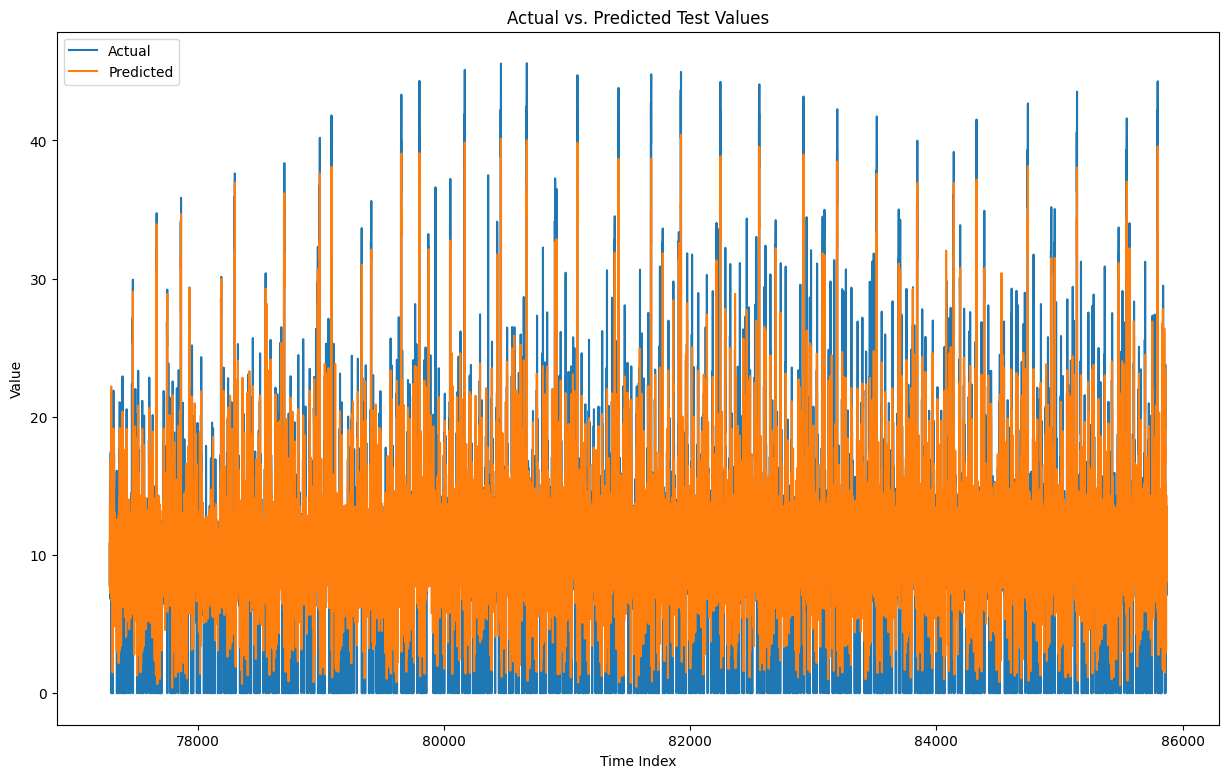

In [95]:
# Plotting
plt.figure(figsize=(15, 9))
plt.plot(time_index, inv_test_y.reshape(-1), label='Actual')
plt.plot(time_index, inv_test_pred_y.reshape(-1), label='Predicted')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Test Values')
plt.legend()
plt.show()

In [97]:
# saving the model
model.save('forecast_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
from keras.models import load_model

# Load the model
model = load_model('forecast_model.h5')